## Importing Liblaries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

### Dataset checking

In [2]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()
print("Max value in the X_train is", x_train[0].max())
print("Min value in the X_train is", x_train[0].min())

Max value in the X_train is 255
Min value in the X_train is 0


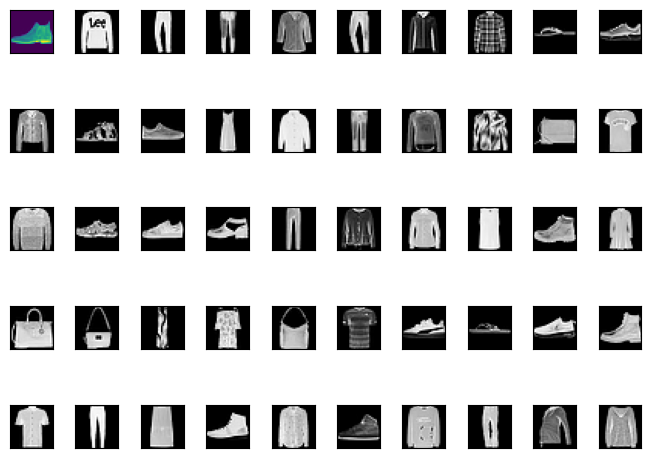

<Figure size 500x1000 with 0 Axes>

In [5]:
fig,axs= plt.subplots(5,10)
plt.figure(figsize=(5,10))
fig.tight_layout(pad=-1)
a=0 
for i in range(5):
    for j in range(10):
        axs[i,j].imshow(tf.squeeze(x_test[a]))
        axs[i,j].xaxis.set_visible(False)
        axs[i,j].yaxis.set_visible(False)
        a= a+1
        plt.gray()

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [7]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# adding noise to images
noise_factor =0.6
x_train_noisy= x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [10]:
x_train_noisy = tf.clip_by_value(x_train_noisy,clip_value_min=0,clip_value_max=1)
x_test_noisy = tf.clip_by_value(x_test_noisy,clip_value_min=0,clip_value_max=1)

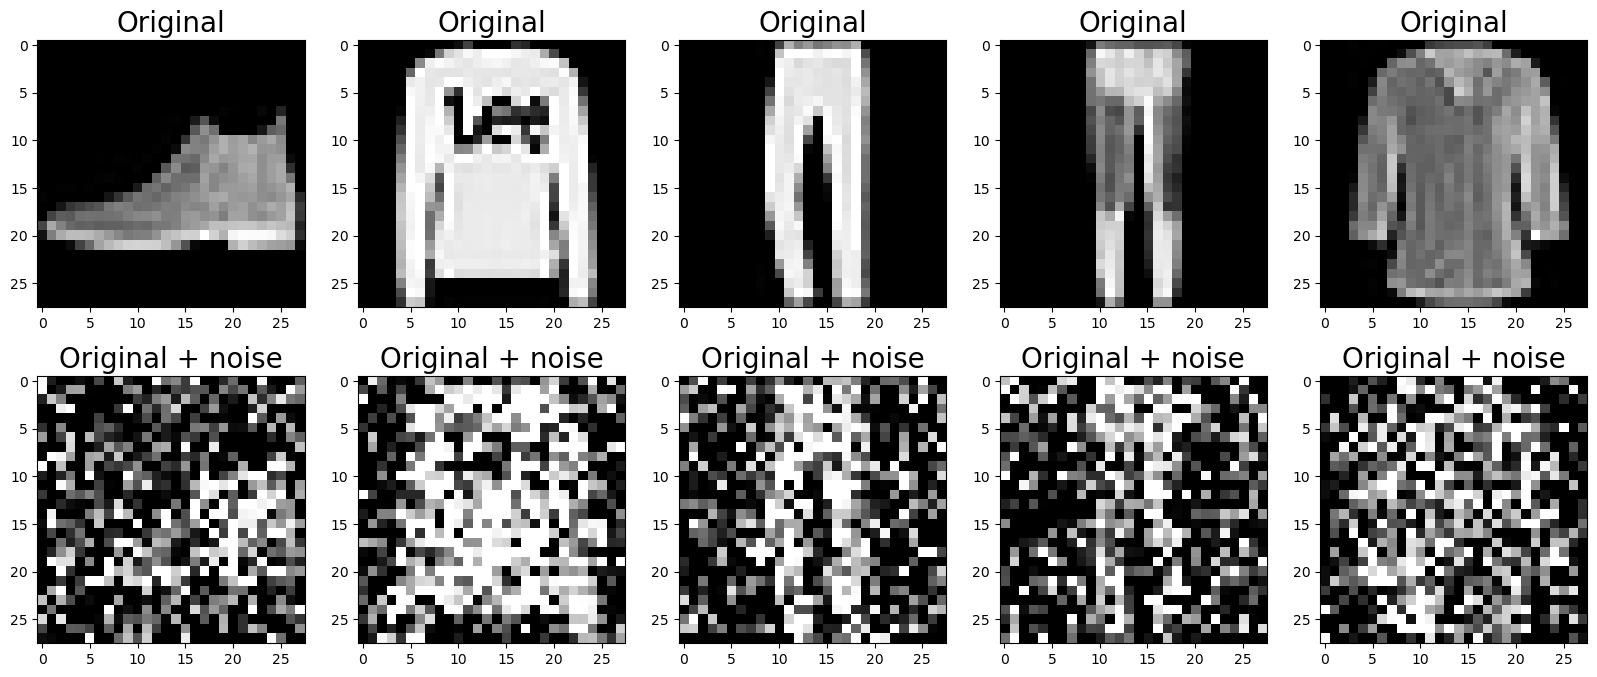

In [12]:
n= 5
plt.figure(figsize=(20,8))
for i in range(n):
    ax= plt.subplot(2,n,i+1)
    plt.title("Original",size=20)
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    
    bx= plt.subplot(2,n,n+i+1)
    plt.title("Original + noise",size=20)
    plt.imshow(x_test_noisy[i])
    plt.gray()
plt.show()

In [15]:
## denoising model
class Denoise(tf.keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder= tf.keras.Sequential([Input(shape=(28,28,1)),
                                          Conv2D(16,(3,3), activation='relu',padding='same',strides=2),
                                          Conv2D(8,(3,3),activation='relu',padding='same',strides=2)])
        self.decoder = tf.keras.Sequential([Conv2DTranspose(8, kernel_size=3,strides=2,activation='relu',padding='same'),
                                           Conv2DTranspose(16, kernel_size=3,strides=2,activation='relu',padding='same'),
                                           Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same')])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

In [16]:
autoencoder= Denoise()

In [17]:
autoencoder.compile(optimizer='adam',loss='mse')

In [18]:
autoencoder.fit(x_train_noisy,x_train,
               epochs=10,
               shuffle=True,
               validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0501 - val_loss: 0.0247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0245 - val_loss: 0.0240
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0238 - val_loss: 0.0235
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0234 - val_loss: 0.0232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0228 - val_loss: 0.0226
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0224 - val_loss: 0.0223
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0223 - val_loss: 0.0223
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0222 - val_loss: 0.0221


In [23]:
autoencoder.summary()

Model: "denoise"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 7, 7, 8)             │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (32, 28, 28, 1)             │           1,897 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

In [19]:
### Denoising Noisy Images
encoded_imgs= autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

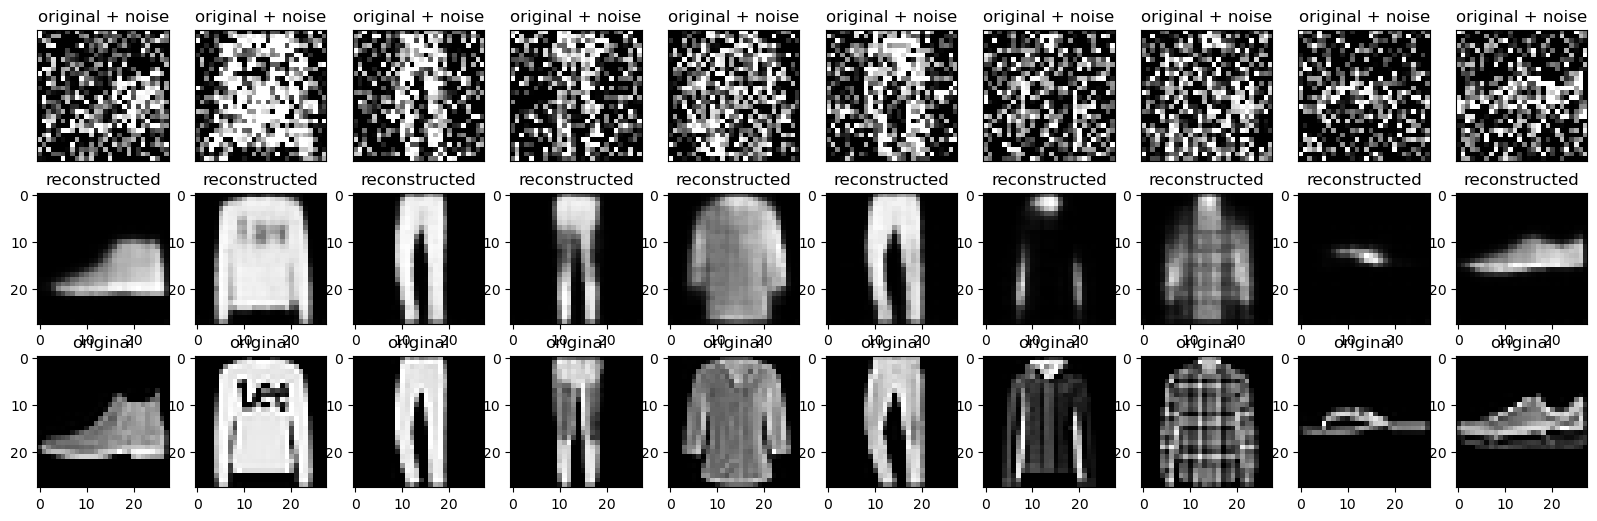

In [22]:
n=10
plt.figure(figsize=(20,6))
for i in range(n):
    #display original+ noise
    bx= plt.subplot(3,n,i+1)
    plt.title('original + noise')
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    
    #diaplay reconstruction
    cx= plt.subplot(3,n,i+n+1)
    plt.title('reconstructed')
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
    
    #diaplay reconstruction
    ax= plt.subplot(3,n,i+2*n+1)
    plt.title('original')
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()